In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
import chardet
with open("/home/iradspm/Msc/Data Analytics/Datasets/spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read())
result['encoding']

'Windows-1252'

In [3]:
data=pd.read_csv("/home/iradspm/Msc/Data Analytics/Datasets/spam.csv", encoding='Windows-1252')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df=data[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
#remove punctuations
def remove_punctuations(text):
    punctuation_free="".join([i for i in text if i not in string.punctuation])
    return punctuation_free

In [7]:
df['clean_text']=df['v2'].apply(lambda x:remove_punctuations(x))

/tmp/ipykernel_52873/3486055651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text']=df['v2'].apply(lambda x:remove_punctuations(x))


In [8]:
df

,v1,v2,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...


In [9]:
#lower case
df["Clean_text_lower"]=df['clean_text'].apply(lambda x:x.lower())

/tmp/ipykernel_52873/3330312304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_text_lower"]=df['clean_text'].apply(lambda x:x.lower())


In [10]:
df

,v1,v2,clean_text,Clean_text_lower
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,will ì b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,pity was in mood for that soany other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,the guy did some bitching but i acted like id ...


In [11]:
#tokenize clean_text_lower
import re
def tokenize_text(text):
    tok=re.split(" ", text)
    return tok

In [12]:
df['tokens']=df['Clean_text_lower'].apply(lambda x: tokenize_text(x))

In [13]:
df

,v1,v2,clean_text,Clean_text_lower,tokens
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,will ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,pity was in mood for that soany other suggest...,"[pity, , was, in, mood, for, that, soany, othe..."
5570,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,the guy did some bitching but i acted like id ...,"[the, guy, did, some, bitching, but, i, acted,..."


In [14]:
#remove stop words
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/iradspm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
df['Clean_text_lower'].value_counts()

sorry ill call later                                                                                                                                     30
ok                                                                                                                                                       19
i cant pick the phone right now pls send a message                                                                                                       12
okie                                                                                                                                                      7
ok lor                                                                                                                                                    5
                                                                                                                                                         ..
ok but knackered just came home and went to sleep not good at th

In [22]:
# add new stop words
new_stop_words=['ok','okie','lor','ltgt','lei','ur','u','i','im']
stopwords.extend(new_stop_words)

In [23]:
def stop_words_remove(text):
    s=" ".join([i for i in text if i not in stopwords])
    return s

In [24]:
df['stop_words_free']=df['tokens'].apply(lambda x: stop_words_remove(x))

In [25]:
df

,v1,v2,clean_text,Clean_text_lower,tokens,stop_words_free
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...",dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...",nah dont think goes usf lives around though
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...",2nd time tried 2 contact å£750 pound prize 2 c...
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,will ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]",ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,pity was in mood for that soany other suggest...,"[pity, , was, in, mood, for, that, soany, othe...",pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,the guy did some bitching but i acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...",guy bitching acted like id interested buying s...


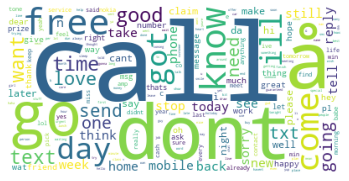

In [26]:
text=" ".join(df['stop_words_free'])
word_cloud=WordCloud(collocations=False, background_color='white').generate(text)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()